# Multiple Linear Regression with Dummies - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year_view.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. 

In this exercise, the dependent variable is 'price', while the independent variables are 'size', 'year', and 'view'.

#### Regarding the 'view' variable:
There are two options: 'Sea view' and 'No sea view'. You are expected to create a dummy variable for view and include it in the regression

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\real_estate_price_size_year_view.csv')
data.head()

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view


In [3]:
re_data = data.copy()

In [4]:
re_data['view'].unique()


array(['No sea view', 'Sea view'], dtype=object)

## Create a dummy variable for 'view'

In [5]:
re_data['view']= re_data['view'].map({'No sea view': 0, 'Sea view': 1})
re_data.head()

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


In [6]:
re_data.describe()

,price,size,year,view
count,100.000000,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000,0.490000
std,77051.727525,297.941951,4.729021,0.502418
min,154282.128000,479.750000,2006.000000,0.000000
25%,234280.148000,643.330000,2009.000000,0.000000
50%,280590.716000,696.405000,2015.000000,0.000000
75%,335723.696000,1029.322500,2018.000000,1.000000
max,500681.128000,1842.510000,2018.000000,1.000000


## Create the regression

### Declare the dependent and the independent variables

In [7]:
#dependent variable is price while independent variable is size and year. Hence:
y = re_data['price']
x1 = re_data[['size','view']]

### Regression with view Factor

In [8]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     374.4
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.44e-46
Time:                        17:38:14   Log-Likelihood:                -1158.3
No. Observations:                 100   AIC:                             2323.
Df Residuals:                      97   BIC:                             2330.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.748e+04   8337.182      9.294      0.000    6.09e+04     9.4e+04
size         218.7521      8.902     24.574      0.000     201.085     236.420
view        5.756e+04   5278.883     10.904      0.000    4.71e+04     6.8e+04
==============================================================================
Omnibus:                       24.354   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.619
Skew:                           0.896   Prob(JB):                     2.27e-12
Kurtosis:                       6.107   Cond. No.                     2.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Regression without view Factor

In [9]:
y = re_data['price']
x2 = re_data['size']


In [10]:
x_prime = sm.add_constant(x2)
results_prime = sm.OLS(y,x_prime).fit()
results_prime.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           8.13e-31
Time:                        17:38:14   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The addition of view to the model is statistically significant. Hence, the regression analysis inclusive of the independent variable 'views' would be added. 

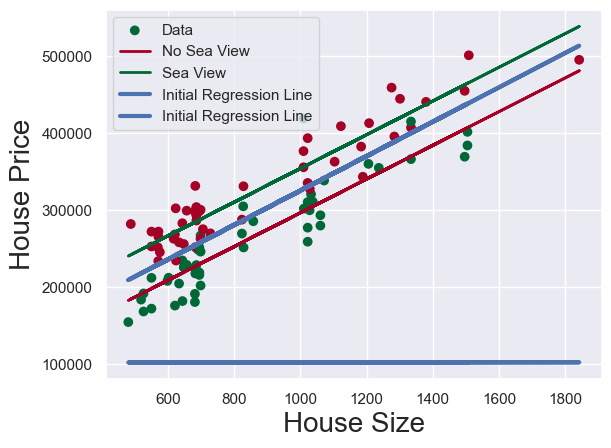

In [11]:
plt.scatter(re_data['size'], y, label="Data",c= re_data['view'], cmap= 'RdYlGn_r')
y_view_no = 77480 + 218.7521 * re_data['size'] # scenario two of no sea view 
y_view_yes = 77480 + 218.7521 * re_data['size'] + (57560 * 1) # scenario dummy variable of sea view presence
yhat = x1*223.1787 + 101900 #initial regression line with size as only independent variable
fig = plt.plot(re_data['size'], y_view_no, lw=2, c='#a50026', label='No Sea View')
fig = plt.plot(re_data['size'], y_view_yes, lw=2, c='#006837', label='Sea View')
fig = plt.plot(re_data['size'], yhat, lw = 3, c = '#4C72B0',label = 'Initial Regression Line')

plt.xlabel('House Size', fontsize=20)
plt.ylabel('House Price', fontsize=20)
plt.legend()  # Adds a legend to distinguish the lines

plt.show()


In [12]:
x

,const,size,view
0,1.0,643.09,0
1,1.0,656.22,0
2,1.0,487.29,1
3,1.0,1504.75,0
4,1.0,1275.46,1
...,...,...,...
95,1.0,549.80,1
96,1.0,1037.44,0
97,1.0,1504.75,0
98,1.0,648.29,0


In [32]:
sample_data = pd.DataFrame({'const':1, 'size':[1500.05,1500.05],'view':[1,0]})
sample_data = sample_data [['const','size','view']]
sample_data

,const,size,view
0,1,1500.05,1
1,1,1500.05,0


In [33]:
sample_data = sample_data.rename(index={0:'Desmond',1:'Alicia'})
sample_data

,const,size,view
Desmond,1,1500.05,1
Alicia,1,1500.05,0


In [34]:
predictions = results.predict(sample_data)
predictions

Desmond    463183.247659
Alicia     405623.398658
dtype: float64

In [35]:
sample_prime = sample_data[['const','size']]
sample_prime

,const,size
Desmond,1,1500.05
Alicia,1,1500.05


In [36]:
predictions_prime = results_prime.predict(sample_prime)
predictions_prime

Desmond    436691.87463
Alicia     436691.87463
dtype: float64

In [37]:
predicted_re = pd.DataFrame({'Predictions': predictions})
predicted_re

,Predictions
Desmond,463183.247659
Alicia,405623.398658


In [38]:
predicted_result = sample_data.join(predicted_re)
predicted_result

,const,size,view,Predictions
Desmond,1,1500.05,1,463183.247659
Alicia,1,1500.05,0,405623.398658
